In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# 7장 기하학적 변환
- 영상을 이동하거나 영상 모양을 변형하는 처리
### 1. 순방향 변환

512 512


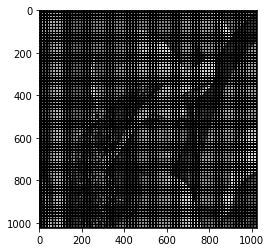

In [4]:
src= cv2.imread("lenna.bmp",0)
height, width= src.shape
#이미지에서 행 h, 컬럼 w

print(height, width)

dst= np.zeros((height*2, width*2), src.dtype)
              
for r in range(height):
    for c in range(width):
        dst[r*2, c*2]= src[r,c]
              
imshow("",dst)

512 512


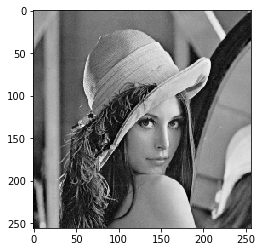

In [9]:
src= cv2.imread("lenna.bmp",0)
height, width= src.shape

print(height, width)

dst= np.zeros((int(height/2), int(width/2)), src.dtype)
              
for r in range(height):
    for c in range(width):
        dst[int(r/2.0), int(c/2.0)]= src[r,c]
              
imshow("",dst)

### 2. 역방향 변환
- 루프를 출력영상 기준으로 크기만큼 돌고, height2, width2 = dst.shape for r in range(height2):     for c in range(width2):
- dst[r,c]가 src의 어디인지 묻는거 다름

512 512


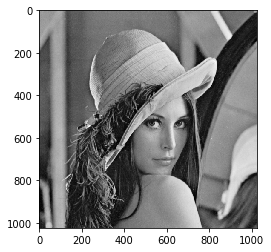

(1024, 1024)


In [10]:
src= cv2.imread("lenna.bmp",0)
height, width= src.shape

print(height, width)

dst= np.zeros((height*2, width*2), src.dtype)
height2, width2 = dst.shape

for r in range(height2):
    for c in range(width2):
        dst[r, c]= src[int(r/2.0) , int(c/2.0)]
              
imshow("",dst)
print(dst.shape)

512 512


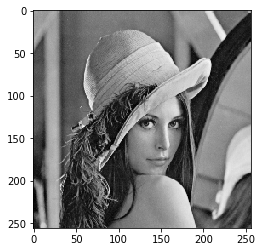

(256, 256)


In [13]:
src= cv2.imread("lenna.bmp",0)
height, width= src.shape

print(height, width)

dst= np.zeros((int(height/2), int(width/2)), src.dtype)
height2, width2 = dst.shape

for r in range(height2):
    for c in range(width2):
        dst[r, c]= src[int(r*2) , int(c*2)]
              
imshow("",dst)
print(dst.shape)

In [ ]:
s= 0.5 #s=2.0
src= cv2.imread("lenna.bmp",0)
height, width= src.shape

print(height, width)

dst= np.zeros((int(height*s), int(width*s)), src.dtype)
height2, width2 = dst.shape

for r in range(height2):
    for c in range(width2):
        dst[r, c]= src[int(r/s) , int(c/s)]
              
imshow("",dst)
print(dst.shape)

### 3. affine 행렬 M

In [14]:
M= np.array( [[1,0,50], [0,1,-30]])
# p= np.array([5,7]) 이라는 좌표의 값 구하고 싶은데, 
# m이 2by3이니까. 컬럼벡터 만들어 3by1 벡터 필요함 -> [1] 넣어줘야!!

p= np.array( [[5], [7], [1]])

np.matmul(M,p)   #5+50=55  7-30=-23

array([[ 55],
       [-23]])

In [15]:
M= np.array( [[1,0,50], [0,1,-30]])
p= np.array( [[5,6,7,8,9,10], [7,7,7,7,7,7], [1,1,1,1,1,1]])

np.matmul(M,p)   # 행렬계산하는 이유: compact한 계산 위해서 [5,6,7,8,9,10]x축벡터, [7,7,7,7,7,7]y축벡터
#전체 영상 좌표값 넣으면 어디로 가는지 계산 가능한것,,

array([[ 55,  56,  57,  58,  59,  60],
       [-23, -23, -23, -23, -23, -23]])

[2 0 70] [x]    =2x+70
[0 2 50] [y]    =2y+50
         [1]

## 4. 확대/축소 resize
- resize(src, dst, Size(), 2.0, 2.0)
- 다른거 다 그대로고 크기만 다를때는 m 행렬계산보다 이거로
- interpolation 조절따라 "계단현상"( 모자이크 )

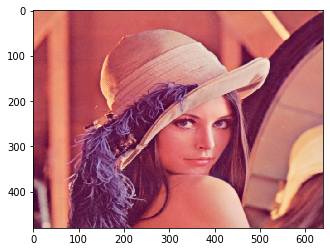

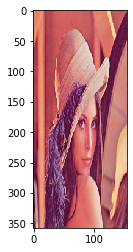

In [16]:
src= cv2.imread("lenna.bmp")
dst= cv2.resize(src, dsize=(640, 480)) #내가 원하는 크기로 영상
dst2= cv2.resize(src, dsize=(0,0), fx=0.3, fy=0.7) #비율로 정하기

imshow("", dst)
imshow("", dst2)

- 특별한 목적없으면 interpolation은 기본값씀....... 양선형보간법

In [21]:
src= cv2.imread("lenna.bmp")
dst= cv2.resize(src, dsize=(0,0), fx=0.1, fy=0.1, interpolation=0) #1/10로 줄인다음에 
dst= cv2.resize(src, dsize=(0,0), fx=10.0, fy=10.0, interpolation=0) #양선형보간법

dst2= cv2.resize(src, dsize=(0,0), fx=0.1, fy=0.1, interpolation=1) # interpolation:평균이기때문에 blur느낌 
dst2= cv2.resize(src, dsize=(0,0), fx=10.0, fy=10.0, interpolation=1) #한번에 많이 줄였다 한번에 높여서 "계단현상" 발생

cv2.imshow('dst', dst)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

### cv2.pyrUp(src) / pyrDown
- 고속으로 두배 늘리고 두배 줄이는 함수: interpolation 설정하진 못함
- 단계적으로 늘리고 줄이기때문에 계단현상 X

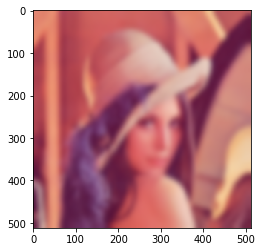

In [22]:
for i in range(3):
    src= cv2.pyrDown (src);
for i in range(3):
    src= cv2.pyrUp(src);
imshow("", src)

## 5. M을 이용한 transformation
### cv2.warpAffine
- scale은 전용함수 쓰는게 편함
- 회전 getRotationmatrix2D(center, angle, scale) : angle이 radian 아님

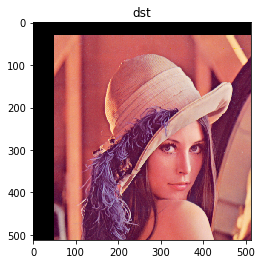

In [24]:
src= cv2.imread('lenna.bmp')
affine_mat= np.array([[1, 0, 50],
                     [0, 1, 30]]).astype(np.float32)
dst= cv2.warpAffine(src, affine_mat, (0,0))
imshow('dst', dst)

# cv2.warpAffine(src, affine_mat, (700,700))에 사이즈 조절 가능하나보통 사이즈 조절X 0,0씀
# 매핑할수 없는 공간 검정색,,  

[[ 6.12323400e-17  1.00000000e+00 -2.84217094e-14]
 [-1.00000000e+00  6.12323400e-17  5.12000000e+02]]


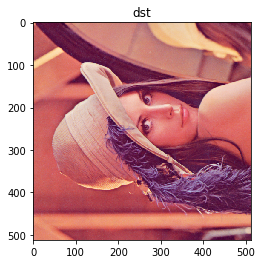

In [26]:
src= cv2.imread('lenna.bmp')
cp= (src.shape[1]/2, src.shape[0]/2)
affine_mat= cv2.getRotationMatrix2D(cp, 90, 1)
print(affine_mat)

dst= cv2.warpAffine(src, affine_mat, (0,0))
imshow('dst', dst)

[[   1.47224319    0.85       -338.49425573]
 [  -0.85          1.47224319   96.70574427]]


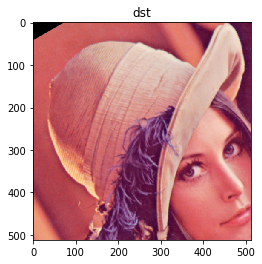

In [29]:
#한꺼번에 이동, 회전,translation 다 하려면

src= cv2.imread('lenna.bmp')
cp= (src.shape[1]/2, src.shape[0]/2)
affine_mat= cv2.getRotationMatrix2D(cp, 30, 1.7)
print(affine_mat)
affine_mat[0,2] +=90  # x축
# += : 자기자신,, 
affine_mat[1,2] = affine_mat[1,2] + 90  # y

dst= cv2.warpAffine(src, affine_mat, (0,0))
imshow('dst', dst)

## 원근 변환
- 마우스 포인트로 선택

def on_mouse(event, x, y, flags, param):
    global cnt, src_pts
    if event == cv2.EVENT_LBUTTONDOWN:
        if cnt < 4:     # 클릭4개 할거고, 좌표 array로. 단 왼쪽 상단부터 시작하는 순서 그대로 지켜야함
            src_pts[cnt, :] = np.array([x, y]).astype(np.float32)
            cnt += 1

            cv2.circle(src, (x, y), 5, (0, 0, 255), -1) # 클릭시 표시하는
            cv2.imshow('src', src)
        
        if cnt == 4:
            w = 200   # 명함  400,200, 매번 설정해줄수는 없으니깐 설정코드해보면 
            h = 300

            dst_pts = np.array([[0, 0],
                                [w - 1, 0],
                                [w - 1, h - 1],
                                [0, h - 1]]).astype(np.float32)

            pers_mat = cv2.getPerspectiveTransform(src_pts, dst_pts)

            dst = cv2.warpPerspective(src, pers_mat, (w, h))

            cv2.imshow('dst', dst)


cnt = 0
src_pts = np.zeros([4, 2], dtype=np.float32)
src = cv2.imread('white.jpg')

if src is None:
    print('Image load failed!')
    
cv2.namedWindow('src')
cv2.setMouseCallback('src', on_mouse)

cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
def on_mouse(event, x, y, flags, param):
    global cnt, src_pts
    if event == cv2.EVENT_LBUTTONDOWN:       
                
            src_pts[cnt, :] = np.array([x, y]).astype(np.float32)
            cnt += 1

            cv2.circle(src, (x, y), 5, (0, 0, 255), -1)
            cv2.imshow('src', src)
        
    if cnt == 3:
            w = 100 
            h = 100

            dst_pts = np.array([[50,50], [150,50], [100,170]]).astype(np.float32)
            
            affine_mat = cv2.getAffineTransform(src_pts, dst_pts)
            dst = cv2.warpAffine(src, affine_mat, (250, 250))

            cv2.imshow('dst', dst)


cnt = 0
src_pts = np.zeros([3, 2], dtype=np.float32)
src = cv2.imread('face2.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.namedWindow('src')
cv2.setMouseCallback('src', on_mouse)

cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 여러가지 한번에써보기

In [35]:
image = cv2.imread('car.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges =  255 - cv2.Canny(gray, 30,120)
color =   cv2.bilateralFilter(image, 9, 300, 300)
cartoon = cv2.bitwise_and(color, color, mask=edges)
cv2.imshow("edges", edges)
cv2.imshow("Cartoon", cartoon)
cv2.waitKey(0)
cv2.destroyAllWindows()